/var/folders/j4/zngd8xzn5bj14jfr2vyygwj40000gn/T/ipykernel_10133/1652736269.py:22: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qu = group.quantile(quantiles)
/var/folders/j4/zngd8xzn5bj14jfr2vyygwj40000gn/T/ipykernel_10133/1652736269.py:22: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qu = group.quantile(quantiles)
/var/folders/j4/zngd8xzn5bj14jfr2vyygwj40000gn/T/ipykernel_10133/1652736269.py:22: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qu = group.quantile(

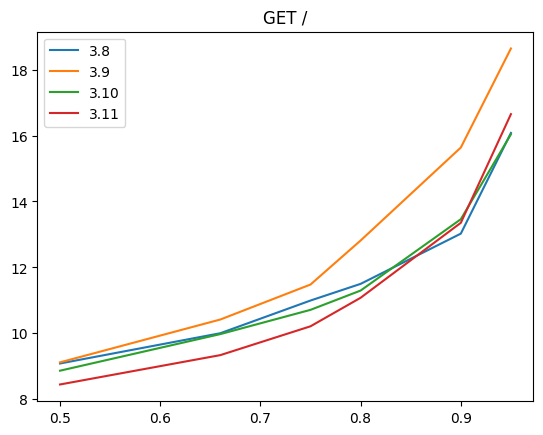

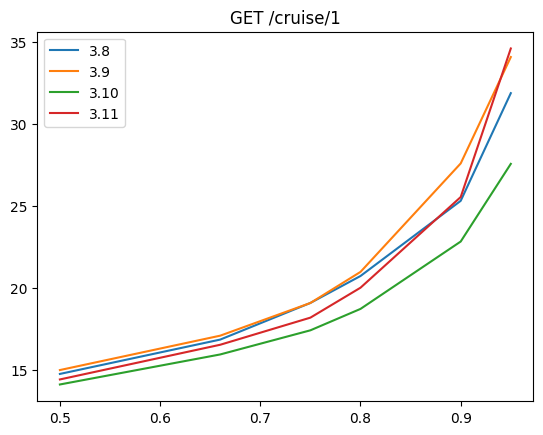

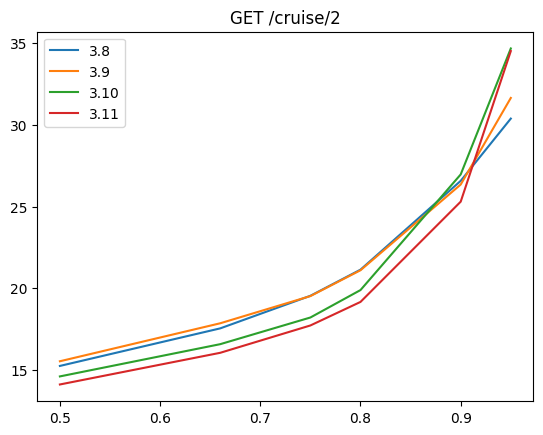

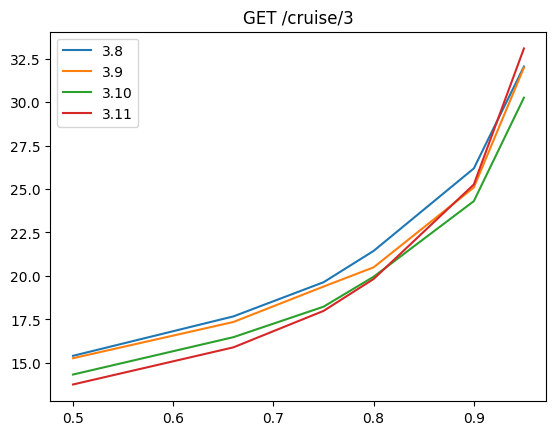

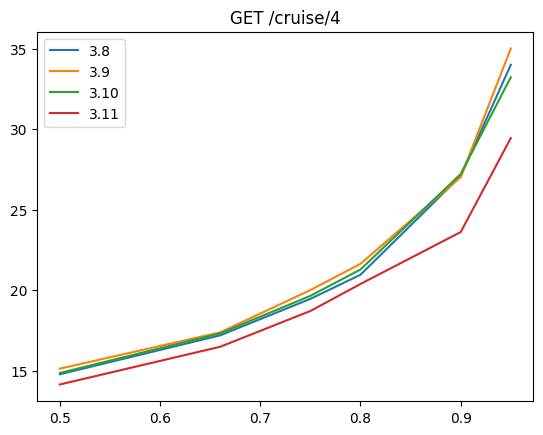

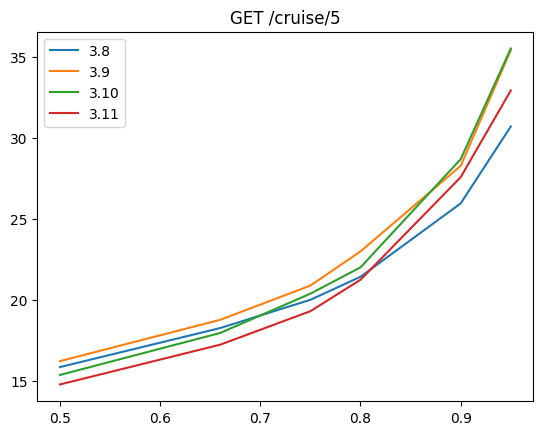

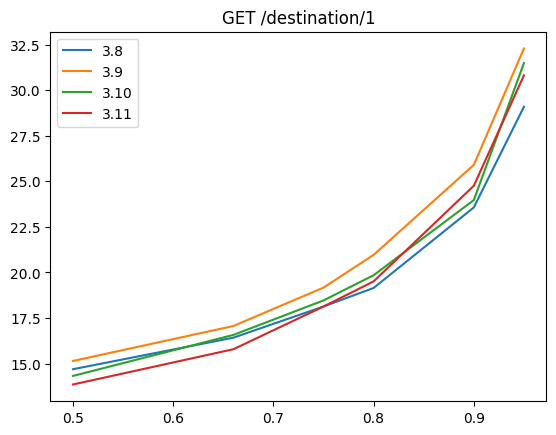

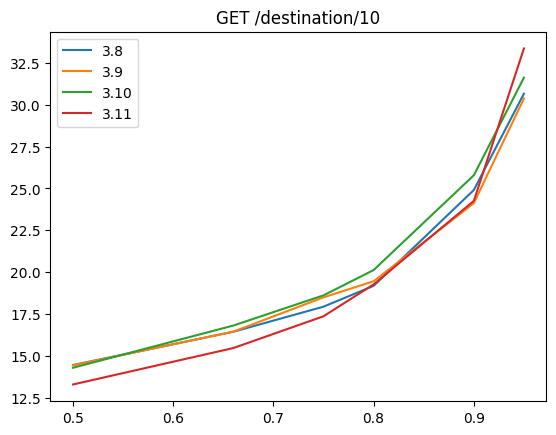

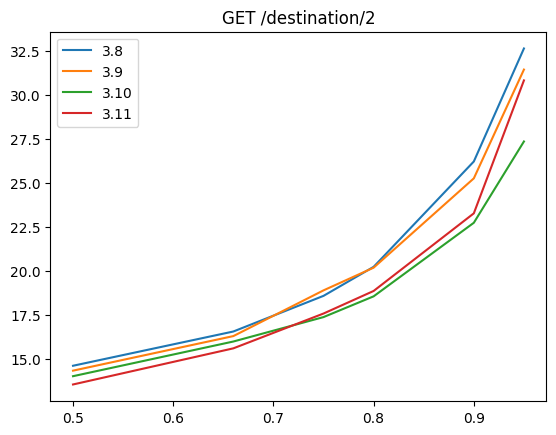

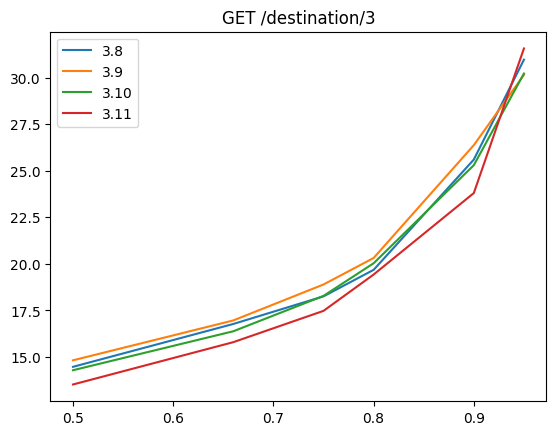

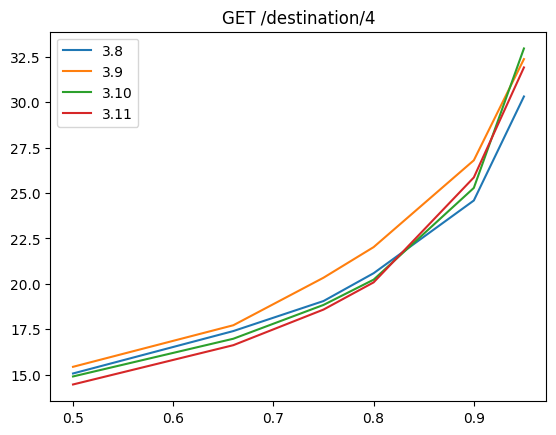

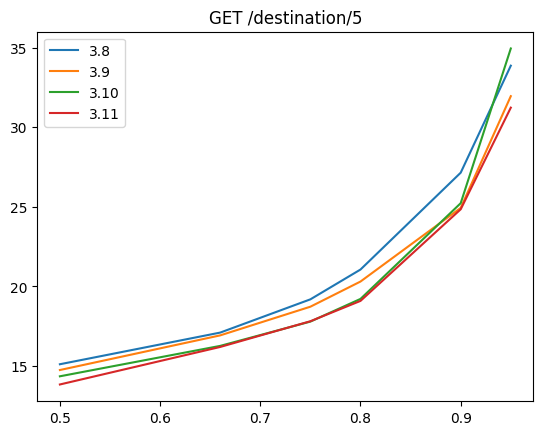

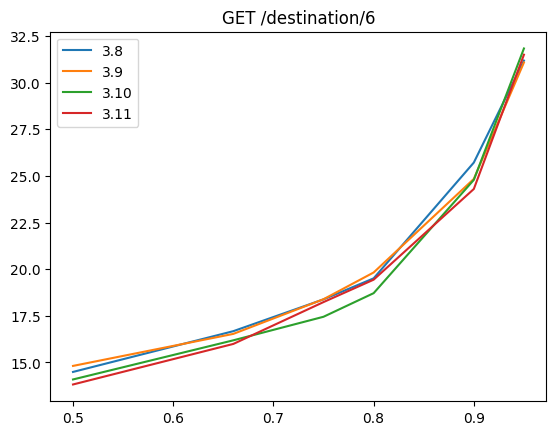

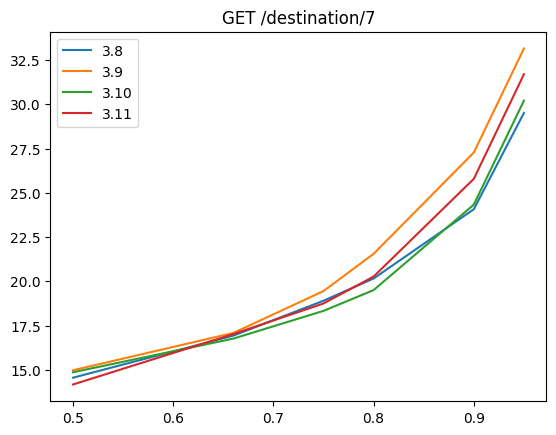

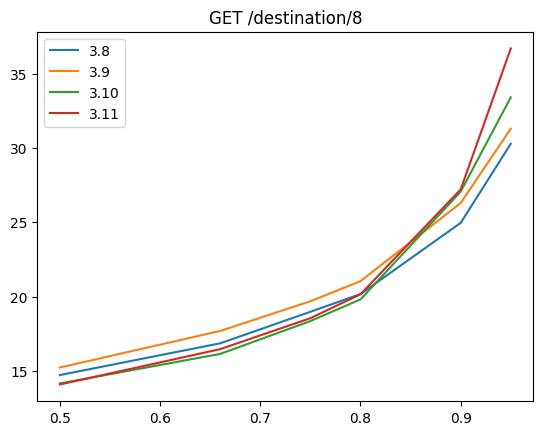

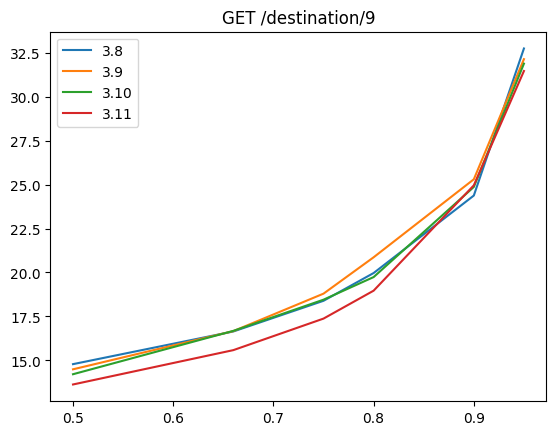

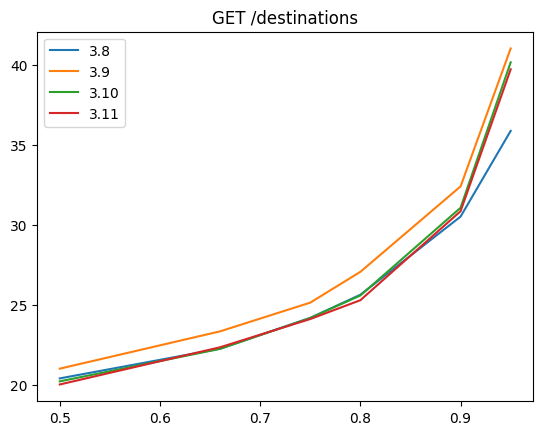

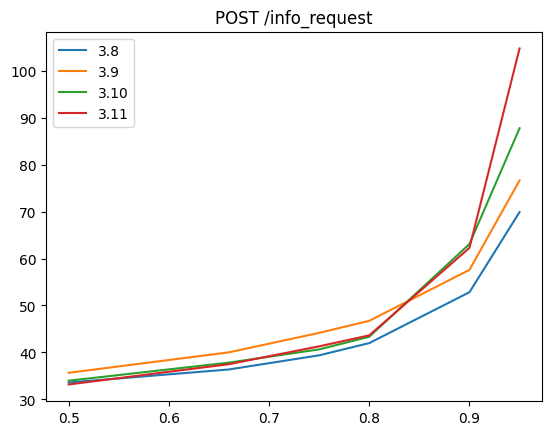

In [23]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from matplotlib import pyplot as plt
from collections import defaultdict

# file to save the model
output_file("results.html")
quantiles = [0.5, 0.66, 0.75, 0.8, 0.9, 0.95]

# instantiating the figure object
colors = iter(['red', 'green', 'blue', 'purple', 'brown', 'orange'])

stats = defaultdict(dict)

for version in ['3.8', '3.9', '3.10', '3.11']:
    df = pd.read_csv(f'results_{version}_fullstats.csv').drop(['exception', 'start_time', 'response_length'], axis=1)
    df.round({'response_time': 2})

    groups = df.groupby(['request_type', 'name'])
    
    for name, group in groups:
        qu = group.quantile(quantiles)
        stats[' '.join(name)][version] = qu

for url, data in stats.items():
    plt.title(url)
    for version, data in data.items():
        plt.plot(quantiles, data['response_time'], label=version)
    plt.legend()
    plt.show()
